In [9]:
import pandas as pd

# Load the dataset
df=pd.read_csv('merged_data_1951_2021.csv')

# Convert the 'time' column to datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract year, month, and day from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day

# Verify changes
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25933 entries, 0 to 25932
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    25933 non-null  datetime64[ns]
 1   lon     25933 non-null  int64         
 2   lat     25933 non-null  float64       
 3   temp    25931 non-null  float64       
 4   year    25933 non-null  int32         
 5   month   25933 non-null  int32         
 6   day     25933 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1)
memory usage: 1.1 MB
None
        time  lon   lat       temp  year  month  day
0 1951-01-01   83  25.5  22.980000  1951      1    1
1 1951-01-02   83  25.5  21.580000  1951      1    2
2 1951-01-03   83  25.5  21.510000  1951      1    3
3 1951-01-04   83  25.5  21.410000  1951      1    4
4 1951-01-05   83  25.5  22.889999  1951      1    5


In [10]:
# Descriptive statistics for a specific column (e.g., 'temp')
descriptive_stats = data['temp'].describe()
print(descriptive_stats)


count    25931.000000
mean        32.020069
std          5.657074
min         13.174508
25%         28.099830
50%         32.505947
75%         35.540001
max         45.848640
Name: temp, dtype: float64


C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


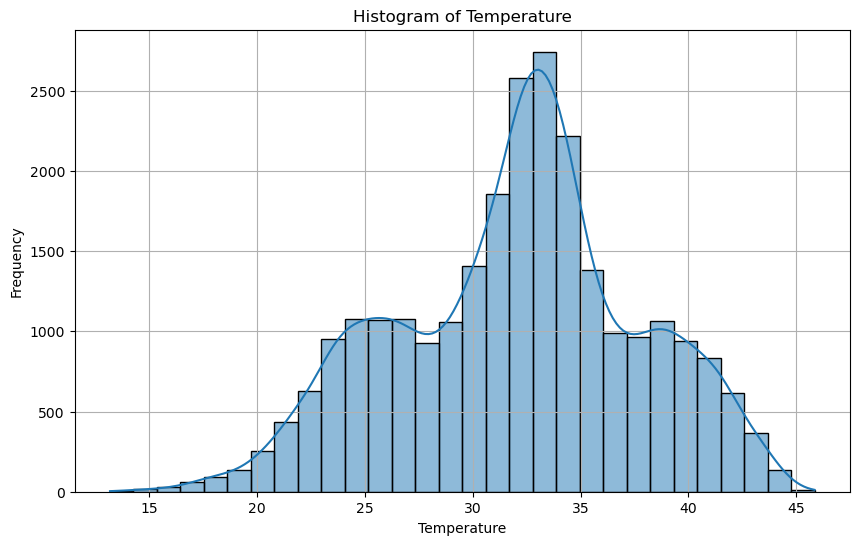

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['temp'], bins=30, kde=True)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.grid(True)
plt.show()



C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


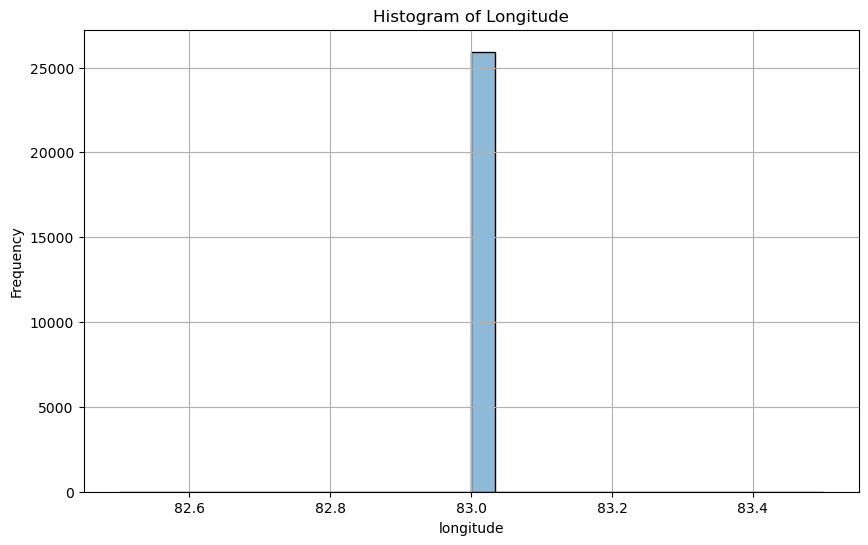

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['lon'], bins=30, kde=True)
plt.xlabel('longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Longitude')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['lon'], bins=30, kde=True)
plt.xlabel('longitude')
plt.ylabel('Frequency')
plt.title('Histogram of Longitude')
plt.grid(True)
plt.show()

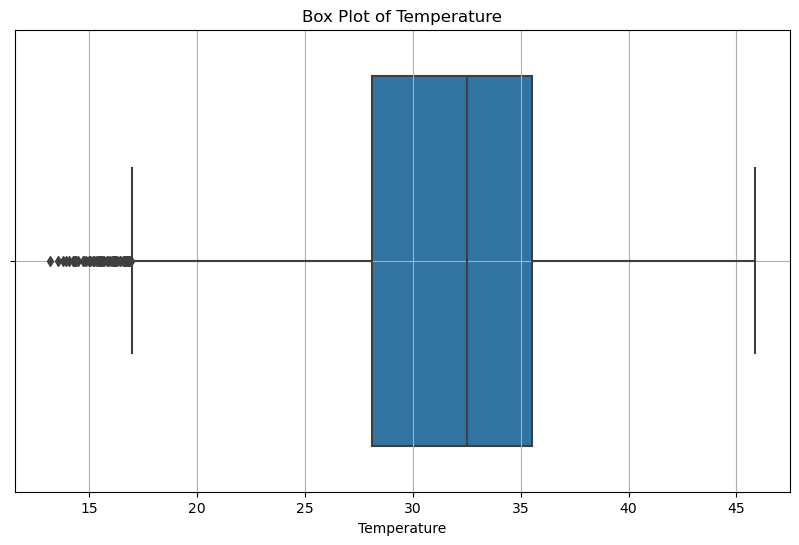

In [12]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['temp'])
plt.xlabel('Temperature')
plt.title('Box Plot of Temperature')
plt.grid(True)
plt.show()



In [26]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['temp'].quantile(0.25)
Q3 = data['temp'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define a factor to determine outliers (typically 1.5)
factor = 1.5

# Determine the bounds for identifying outliers
lower_bound = Q1 - factor * IQR
upper_bound = Q3 + factor * IQR

# Filter the dataset to remove outliers
data_no_outliers = data[(data['temp'] >= lower_bound) & (data['temp'] <= upper_bound)]

# Display the number of records removed
removed_records = len(data) - len(data_no_outliers)
print(f'Records removed using IQR method: {removed_records}')

# Display first few rows of the dataset without outliers
data_no_outliers.head()


Records removed using IQR method: 66


,time,lon,lat,temp,year,month,day,z_score
0,1951-01-01,83,25.5,22.980000,1951,1,1,NaN
1,1951-01-02,83,25.5,21.580000,1951,1,2,NaN
2,1951-01-03,83,25.5,21.510000,1951,1,3,NaN
3,1951-01-04,83,25.5,21.410000,1951,1,4,NaN
4,1951-01-05,83,25.5,22.889999,1951,1,5,NaN


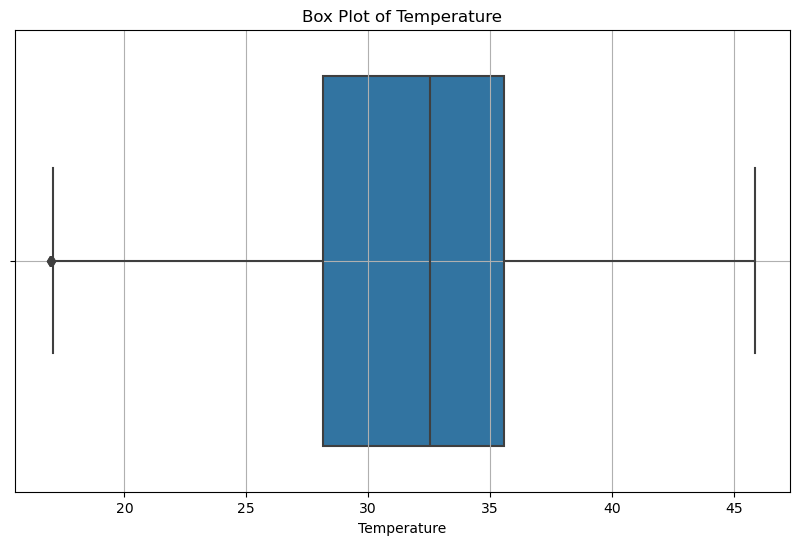

In [29]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['temp'])
plt.xlabel('Temperature')
plt.title('Box Plot of Temperature')
plt.grid(True)
plt.show()

In [30]:
data.shape

(25933, 8)

In [31]:
data_no_outliers.shape

(25867, 8)

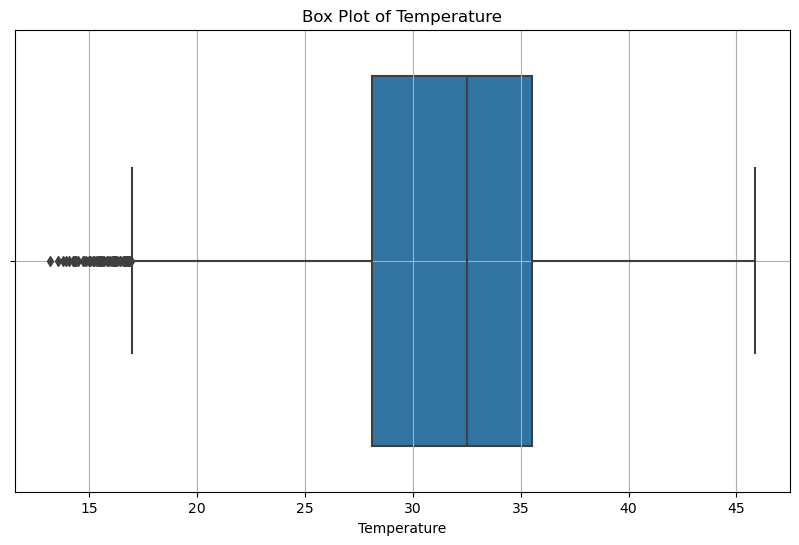

In [25]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['temp'])
plt.xlabel('Temperature')
plt.title('Box Plot of Temperature')
plt.grid(True)
plt.show()


C:\Users\Brijesh kumar\AppData\Local\Temp\ipykernel_12076\3824622749.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['temp'], shade=True)
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


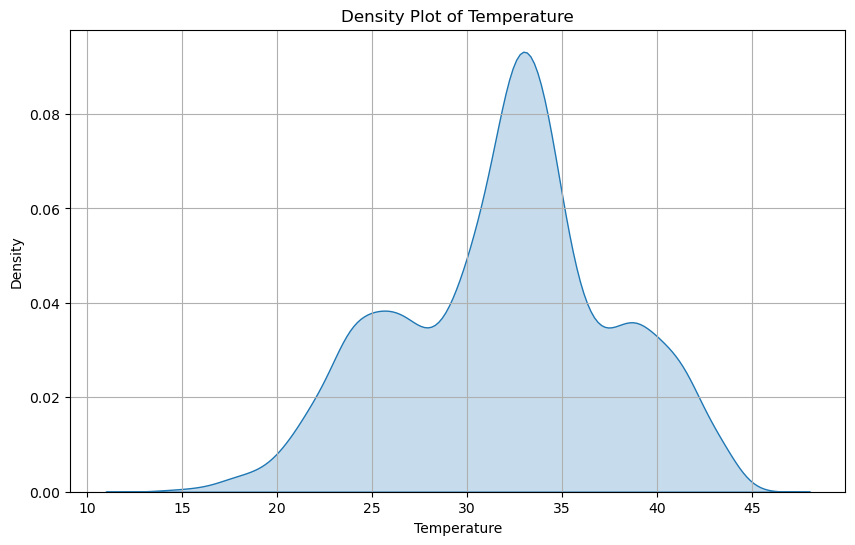

In [13]:
# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['temp'], shade=True)
plt.xlabel('Temperature')
plt.title('Density Plot of Temperature')
plt.grid(True)
plt.show()


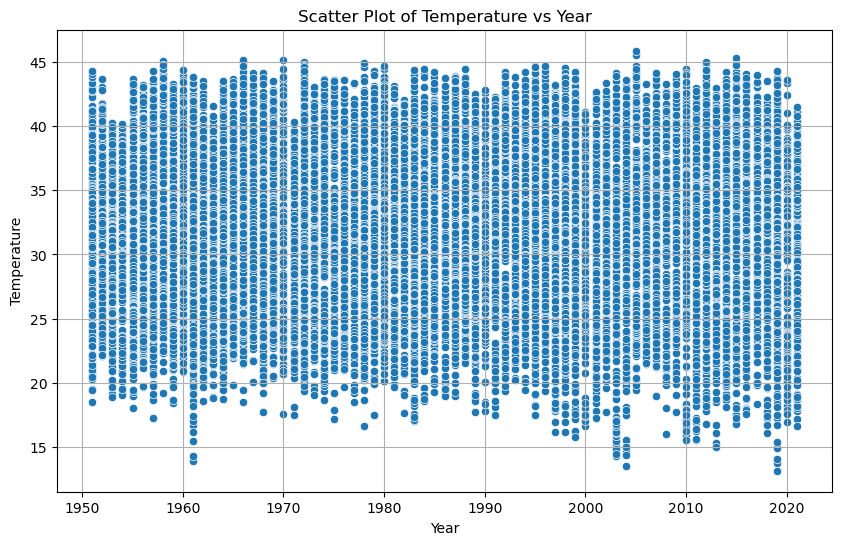

In [14]:
# Scatter plot between two numerical variables (e.g., 'temp' and 'year')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='temp', data=data)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Scatter Plot of Temperature vs Year')
plt.grid(True)
plt.show()


In [15]:
# Calculate the correlation matrix
correlation_matrix = data[['temp', 'year']].corr()
print(correlation_matrix)


          temp      year
temp  1.000000  0.011464
year  0.011464  1.000000


C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


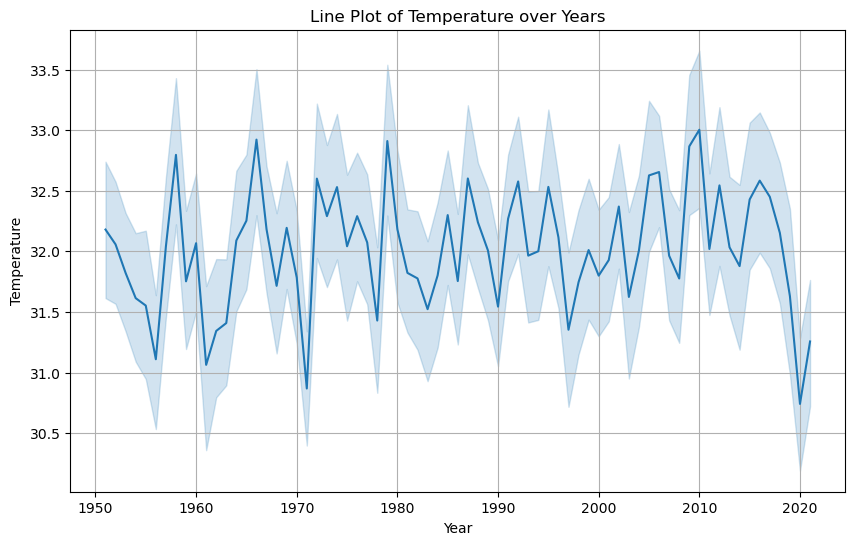

In [16]:
# Line plot of temperature over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='temp', data=data)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Line Plot of Temperature over Years')
plt.grid(True)
plt.show()


<Axes: >

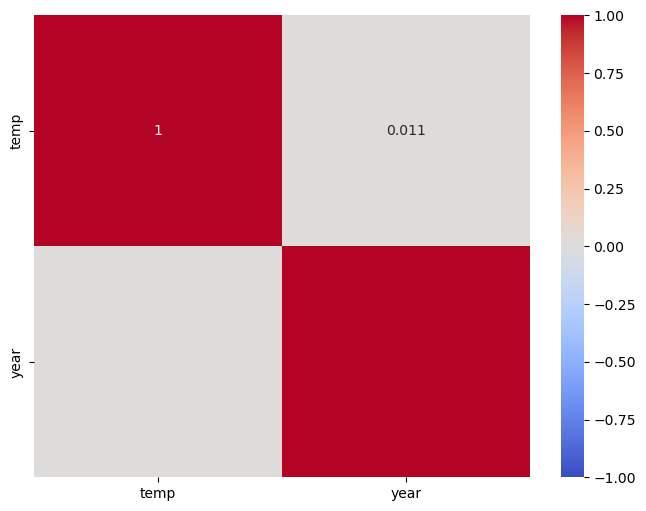

In [17]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


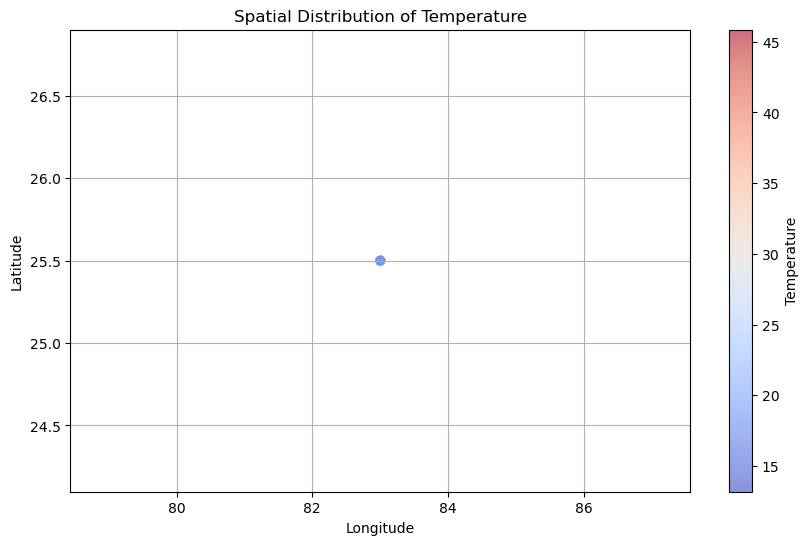

In [19]:
# Scatter plot of temperature readings based on latitude and longitude
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=data['lon'], y=data['lat'], c=data['temp'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Temperature')
plt.grid(True)
plt.show()


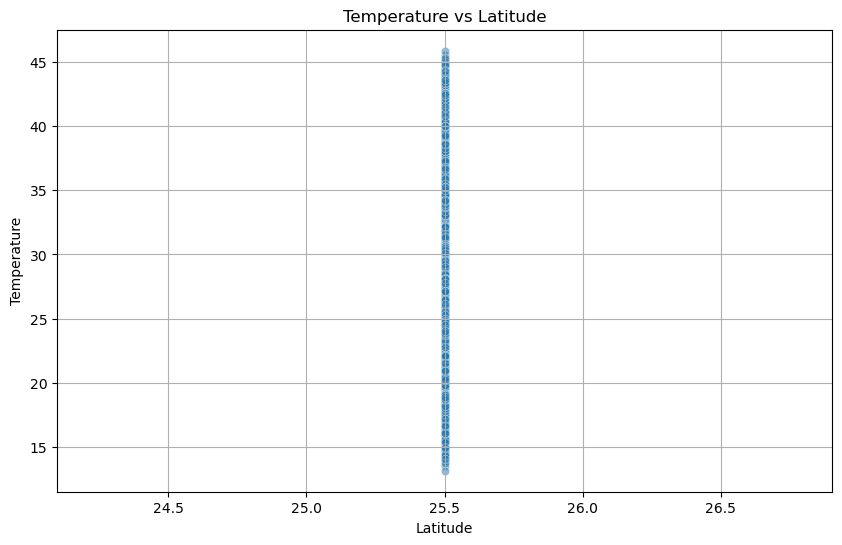

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of temperature vs latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='temp', data=data, alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature vs Latitude')
plt.grid(True)
plt.show()


In [22]:
# Calculate the correlation between latitude and temperature
correlation = data['lat'].corr(data['temp'])
print(f"Correlation between latitude and temperature: {correlation}")


Correlation between latitude and temperature: nan


C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Brijesh kumar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


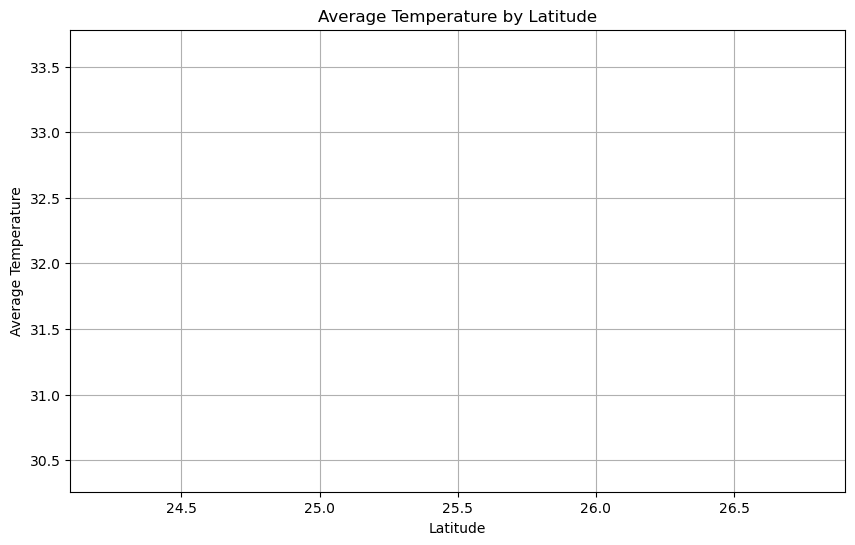

In [23]:
# Calculate average temperature by latitude
avg_temp_by_lat = data.groupby('lat')['temp'].mean().reset_index()

# Line plot of average temperature by latitude
plt.figure(figsize=(10, 6))
sns.lineplot(x='lat', y='temp', data=avg_temp_by_lat)
plt.xlabel('Latitude')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Latitude')
plt.grid(True)
plt.show()


In [32]:
# Check for duplicate rows in the entire dataset
duplicate_rows = data_no_outliers[data_no_outliers.duplicated()]

# Count the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Display the duplicate rows
duplicate_rows

# Print the number of duplicate rows
print(f'Number of duplicate rows: {num_duplicates}')


Number of duplicate rows: 0


In [33]:
data1=data_no_outliers.copy()

In [34]:
data1.shape

(25867, 8)

In [35]:
data1.to_csv("preprocess 1951 to 2021.csv",index=False)

In [36]:
data_no_outliers

,time,lon,lat,temp,year,month,day,z_score
0,1951-01-01,83,25.5,22.980000,1951,1,1,NaN
1,1951-01-02,83,25.5,21.580000,1951,1,2,NaN
2,1951-01-03,83,25.5,21.510000,1951,1,3,NaN
3,1951-01-04,83,25.5,21.410000,1951,1,4,NaN
4,1951-01-05,83,25.5,22.889999,1951,1,5,NaN
...,...,...,...,...,...,...,...,...
25928,2021-12-27,83,25.5,24.007275,2021,12,27,NaN
25929,2021-12-28,83,25.5,21.532618,2021,12,28,NaN
25930,2021-12-29,83,25.5,18.243288,2021,12,29,NaN
25931,2021-12-30,83,25.5,18.774710,2021,12,30,NaN


In [37]:
data1

,time,lon,lat,temp,year,month,day,z_score
0,1951-01-01,83,25.5,22.980000,1951,1,1,NaN
1,1951-01-02,83,25.5,21.580000,1951,1,2,NaN
2,1951-01-03,83,25.5,21.510000,1951,1,3,NaN
3,1951-01-04,83,25.5,21.410000,1951,1,4,NaN
4,1951-01-05,83,25.5,22.889999,1951,1,5,NaN
...,...,...,...,...,...,...,...,...
25928,2021-12-27,83,25.5,24.007275,2021,12,27,NaN
25929,2021-12-28,83,25.5,21.532618,2021,12,28,NaN
25930,2021-12-29,83,25.5,18.243288,2021,12,29,NaN
25931,2021-12-30,83,25.5,18.774710,2021,12,30,NaN


In [40]:
data1.isnull().sum()

time           0
lon            0
lat            0
temp           0
year           0
month          0
day            0
z_score    25867
dtype: int64

In [46]:
data2 = data1.drop(columns=['z_score'])

In [47]:
data2

,time,lon,lat,temp,year,month,day
0,1951-01-01,83,25.5,22.980000,1951,1,1
1,1951-01-02,83,25.5,21.580000,1951,1,2
2,1951-01-03,83,25.5,21.510000,1951,1,3
3,1951-01-04,83,25.5,21.410000,1951,1,4
4,1951-01-05,83,25.5,22.889999,1951,1,5
...,...,...,...,...,...,...,...
25928,2021-12-27,83,25.5,24.007275,2021,12,27
25929,2021-12-28,83,25.5,21.532618,2021,12,28
25930,2021-12-29,83,25.5,18.243288,2021,12,29
25931,2021-12-30,83,25.5,18.774710,2021,12,30


In [48]:
data2.isnull().sum()

time     0
lon      0
lat      0
temp     0
year     0
month    0
day      0
dtype: int64

In [49]:
data2.to_csv("preprocess 1951 to 2021.csv",index=False)